In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [83]:
def preprocess(data):
    x = data.iloc[:, 1:]
    x = x / 255.0
    y = data.iloc[:, 0].to_numpy()
    
    x = np.insert(x.values, 0, 1, axis = 1)    #adding bias unit for all images
        
    return x, y

In [3]:
def softmax(u):
    expu = np.exp(u)
    return expu / np.sum(expu)

In [4]:
def crossEntropy(p,q):
    return -np.vdot(p,np.log(q))

In [63]:
def grad_L(X,Y,beta):
    N = X.shape[0]
    L = 0.0
    
    for i in range(N):
        XiHat = X[i]
        Yi = Y[i]
        qi = softmax(beta @ XiHat)
        
        L += crossEntropy(Yi, qi)
        
    return L

In [102]:
def grad_descent(X,Y, alpha, batch_size):
    numEpochs = 5
    N, d = X.shape
    X = np.insert(X,0,1,axis = 1)
    K = Y.shape[1]
    
    beta = np.zeros((K, d+1))
    Lvals = []
    
    for ep in range(numEpochs):
        
        L = grad_L(X,Y,beta)
        Lvals.append(L)
        
        print("Epoch is: " + str(ep) + " Cost is: " + str(L))
        
        numBatches = N // batch_size
        
        for j in range(numBatches):
        
            prm = np.random.permutation(N)    #randomize the row indices
            prm = prm[0:batch_size]           #grab first group of random rows 
            
            for i in prm:     #choose one random row at a time

                XiHat = X[i]
                Yi = Y[i]

                qi = softmax(beta @ XiHat)
                grad_Li = np.outer(qi - Yi, XiHat)

                beta = beta - alpha * grad_Li
    
    
    return beta, Lvals

In [30]:
def predictLabels(X, beta):
    X = np.insert(X, 0, 1, axis = 1)
    N = X.shape[0]
    predictions = []
    probabilities = []        #used to find examples our model found difficult
    
    for i in range(N):
        XiHat = X[i]
        qi = softmax(beta @ XiHat)
        
        k = np.argmax(qi)
        predictions.append(k)
        probabilities.append(np.max(qi))
        
    return predictions, probabilities

In [52]:
def difficult(x_test, beta, y_test):
    N_test = x_test.shape[0]
    predictions, probabilities = predictLabels(x_test, beta)

    agreement = (predictions == y_test)
    sortedIdxs = np.argsort(probabilities)
    sortedIdxs = sortedIdxs[ :: -1]

    difficultExamples = []

    for i in sortedIdxs:
        if agreement[i] == False:
            difficultExamples.append(i)
            
    return difficultExamples

In [54]:
def accuracy(x_test, beta, y_test):
    N_test = x_test.shape[0]
    predictions, probabilities = predictLabels(x_test, beta)
    
    numCorrect = 0
    for i in range(N_test):

        if predictions[i] == y_test[i]:
            numCorrect += 1 

    accuracy = numCorrect / N_test
    print('Accuracy: ' + str(accuracy))

In [56]:
def showDifficult(z, difficultExamples):
    i = difficultExamples[z]
    Xi = np.reshape(x_test[i][1:], (28,28))
    plt.imshow(Xi)
    print('Predicted: ' , predictions[i])
    print('Actual: ' , y_test[i])

In [96]:
train = pd.read_csv('/Users/dchant/Desktop/Math373/Project2/archive/mnist_train.csv')
test = pd.read_csv('/Users/dchant/Desktop/Math373/Project2/archive/mnist_test.csv')

Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 18273.633591686354
Epoch is: 2 Cost is: 17339.949013424834
Epoch is: 3 Cost is: 16401.010169327245
Epoch is: 4 Cost is: 16779.379183483714
Accuracy: 0.9203

CPU times: user 39.8 s, sys: 2.19 s, total: 42 s
Wall time: 49.6 s


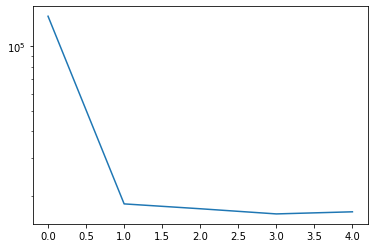

In [105]:
%%time

x_train, y_train = preprocess(train)
x_test, y_test = preprocess(test)

y_train = pd.get_dummies(y_train).values

alpha = 0.01
batch_size = 32
beta, Lvals = grad_descent(x_train, y_train, alpha, batch_size)

plt.semilogy(Lvals)
accuracy(x_test, beta, y_test)
print()

Predicted:  4
Actual:  8


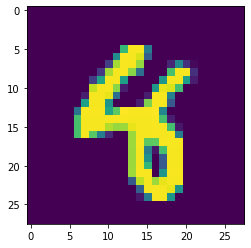

In [98]:
#array of difficult examples
difficultExamples = difficult(x_test, beta, y_test)

#change the number to get the ith difficult example
showDifficult(4, difficultExamples)       